### Import libraries

In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

sns.set_style('darkgrid')

### Load the dataset

In [2]:
df_train = pd.read_csv('customer-churn-prediction-2020/train.csv')
df_test = pd.read_csv('customer-churn-prediction-2020/test.csv')

### Data Exploration

In [3]:
print('Size of train dataset:',df_train.shape)
print('Size of test dataset:', df_test.shape)

Size of train dataset: (4250, 20)
Size of test dataset: (750, 20)


In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [7]:
print('There are {} features:'.format(df_train.shape[1]-1), list(df_train.columns[0:-1]))
print('\nThe label is {} that takes two values no: customer not leaving, and yes: customer leaving with the following summary'.format(df_train.columns[-1]))
print('Train dataset:\n',df_train['churn'].value_counts())
print('\nThe test dataset will not have target label. The focus of the rest of the work will be shifted to train dataset.')


There are 19 features: ['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

The label is churn that takes two values no: customer not leaving, and yes: customer leaving with the following summary
Train dataset:
 no     3652
yes     598
Name: churn, dtype: int64

The test dataset will not have target label. The focus of the rest of the work will be shifted to train dataset.


As can be seen from the summary table of the target label, this is an unbalance dataset with large amount of customer not leaving and a small portion of customer leaving the service. Data exploration on this dataset will be 

In [8]:
#Check for NaN records:
print('Train dataset:',df_train.isna().sum())

Train dataset: state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [9]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


### Data visualization

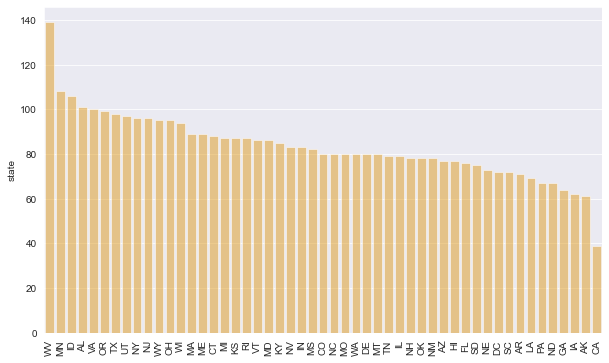

In [10]:
state = df_train['state'].value_counts(ascending =False)
list_state = state.index.to_list()
plt.figure(figsize=(10,6))
sns.barplot(x = list_state, y = state,color = 'orange', alpha = 0.5)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='area_code', ylabel='count'>

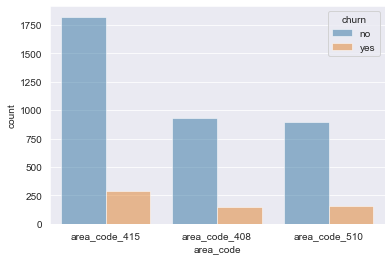

In [11]:
df_train['area_code'].value_counts()
sns.countplot(data = df_train, x = 'area_code', hue = 'churn',alpha = 0.5)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

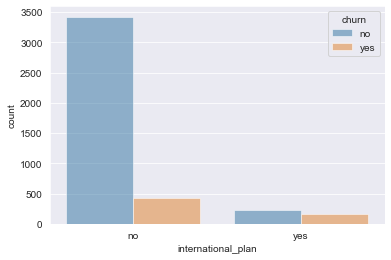

In [12]:
df_train['international_plan'].value_counts()
sns.countplot(data = df_train, x = 'international_plan', hue = 'churn', alpha = 0.5)

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

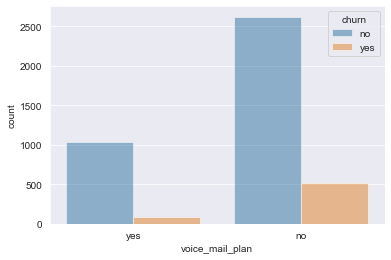

In [13]:
df_train['voice_mail_plan'].value_counts()
sns.countplot(data = df_train, x = 'voice_mail_plan', hue = 'churn', alpha = 0.5)

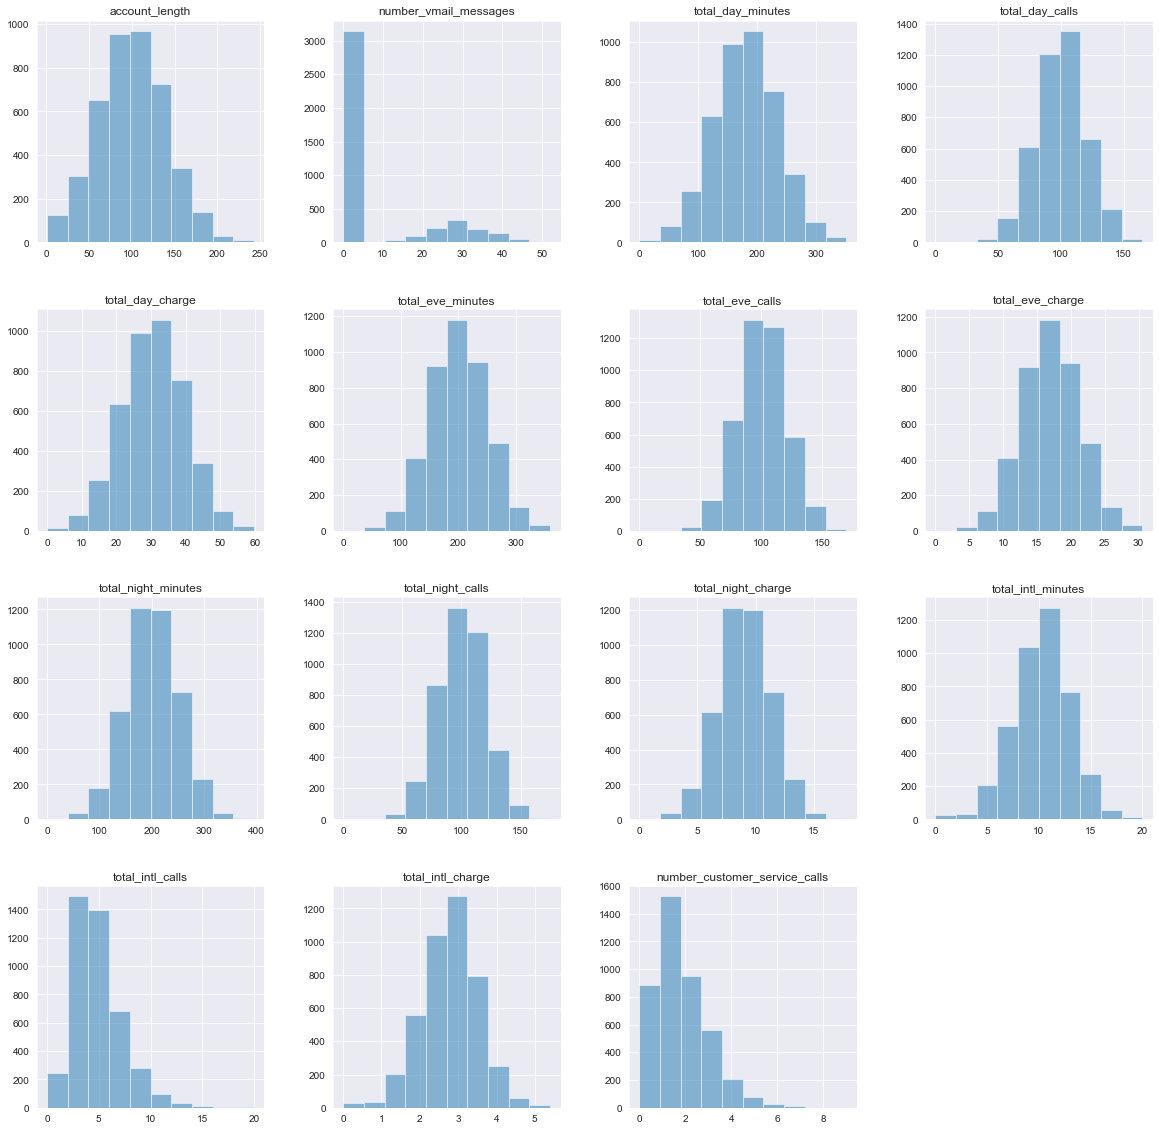

In [14]:
df_train.hist(figsize=(20,20),alpha = 0.5)
plt.show()

### Data preprocessing

In [15]:
# Label encoding the following features:
le = LabelEncoder()
df_train['international_plan']=le.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan']= le.fit_transform(df_train['voice_mail_plan'])
df_train['churn'] = le.fit_transform(df_train['churn'])
df_train['area_code']=le.fit_transform(df_train['area_code'])

In [16]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [18]:
df_train['area_code'].value_counts()

1    2108
0    1086
2    1056
Name: area_code, dtype: int64

In [19]:
# one hot encode the state feature
one_hot_encode_state = pd.get_dummies(df_train['state'])
df_train_onehot= pd.concat([df_train,one_hot_encode_state],axis=1)
df_train_onehot.drop('state',axis = 1, inplace = True)

In [20]:
df_train_onehot.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,107,1,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
1,137,1,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
2,84,0,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
3,75,1,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
4,121,2,0,1,24,218.2,88,37.09,348.5,108,...,0,0,0,0,0,0,0,0,0,0


We now processed all categories variables. However, since we convert the state feature to one hot encoded feature, we end up with a high-dimensal feature matrix and could be computationally expensive. Thus, the next step is performing feature extraction using principal component analysis (PCA)

### Train test split

Split data to train and test sets with stratify to ensure the ratio of target labels are the same in both sets.

In [21]:
X = df_train_onehot.drop('churn', axis=1)
y = df_train_onehot['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify = y)
X_train.shape, X_test.shape

((3400, 69), (850, 69))

In [22]:
y_train.value_counts(normalize=True)

0    0.859412
1    0.140588
Name: churn, dtype: float64

In [23]:
y_test.value_counts(normalize=True)

0    0.858824
1    0.141176
Name: churn, dtype: float64

### Data normalization

Before perfroming feature extraction, we will need to scale the data. Here, we will use the StandardScaler to remove the mean and scale to the unit variance

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
feature_name = scaler.get_feature_names_out()
np.mean(X_train_scaled,axis=0)

array([ 1.14940737e-16,  1.35839052e-17,  3.65720526e-17,  1.85472552e-17,
        3.65720526e-18, -3.13474736e-16, -2.69588273e-16, -2.12117905e-16,
       -2.87874300e-16, -1.45243295e-16,  2.92576421e-17,  7.62788525e-17,
       -2.97801000e-16, -6.67178731e-16,  1.52557705e-16, -4.59762947e-17,
       -7.47114788e-16, -3.86618842e-17,  3.55271368e-17,  1.25389895e-17,
       -3.70945105e-17,  5.01559578e-17, -3.44822210e-17,  3.44822210e-17,
       -1.09716158e-17, -4.59762947e-17,  3.76169684e-17, -1.88084842e-17,
        0.00000000e+00, -8.35932630e-18,  0.00000000e+00,  2.82127263e-17,
       -7.31441052e-18,  6.26949473e-18, -4.02292578e-17, -4.17966315e-18,
        4.17966315e-18,  1.77635684e-17, -1.35839052e-17,  2.84739552e-17,
       -1.67186526e-17,  4.59762947e-17,  4.17966315e-17, -5.22457894e-19,
       -3.08250157e-17, -5.22457894e-18, -3.44822210e-17,  1.46288210e-17,
        3.76169684e-17, -7.57563946e-18,  4.17966315e-17,  1.04491579e-18,
        0.00000000e+00, -

### Data augmentation for minority class

Here, the dataset is imbalanced and will require special technique to balance the dataset. Here, we will implement two main techniques: SMOTE and SMOTE+TOMEK from imbalanced-learn library.

In [38]:
sm =  imblearn.over_sampling.SMOTE(random_state = 45)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
print(Counter(y_train_sm))

Counter({0: 2922, 1: 2922})


In [39]:
smt =  imblearn.combine.SMOTETomek(random_state = 45)
X_train_smt, y_train_smt = smt.fit_resample(X_train_scaled, y_train)
print(Counter(y_train_smt))

Counter({0: 2919, 1: 2919})


Check mean and standard deviation of the train dataset after data augmentation

In [66]:
np.mean(X_train_sm,axis=0)

array([ 2.64886849e-02,  1.24536716e-02,  2.07210072e-01, -1.38862246e-01,
       -1.24278697e-01,  2.67443594e-01,  6.15203676e-03,  2.67433878e-01,
        1.06847586e-01, -1.18081783e-02,  1.06845020e-01,  5.89648847e-02,
       -1.78641084e-02,  5.89691083e-02,  4.68638439e-02, -3.17709219e-02,
        4.68329574e-02,  2.09055941e-01, -3.88483247e-02,  9.54362728e-03,
        1.57916390e-02, -3.69826217e-02,  3.36388427e-02, -2.28733762e-02,
        2.58140217e-02, -1.20671198e-02,  1.30942637e-02,  4.39031883e-03,
        2.92671496e-03, -3.98906057e-02,  8.36204273e-05, -3.33263435e-02,
       -4.15346324e-02,  5.36044552e-03,  9.70292058e-03,  9.06129140e-04,
       -2.75947410e-03,  7.18851198e-03,  3.19252958e-02,  2.16844130e-02,
       -7.18685832e-03,  1.12153989e-02,  1.69542902e-02,  2.13990447e-02,
        3.78995327e-02, -2.79651902e-02, -2.00385972e-02, -4.01227728e-02,
        6.64127712e-03,  4.72320568e-02,  6.70003484e-03,  2.64355083e-02,
        9.46448348e-04,  

In [67]:
np.std(X_train_sm,axis=0)

array([0.92664512, 0.94696191, 1.13499575, 0.87120512, 0.87944087,
       1.07925265, 0.94077354, 1.0792569 , 0.94538876, 0.92336375,
       0.94539177, 0.92069182, 0.92703989, 0.92068429, 0.93219346,
       0.93005122, 0.93211612, 1.10829822, 0.81771509, 1.02652274,
       1.05817625, 0.85071358, 1.15333857, 0.91658322, 1.08459397,
       0.95204998, 1.04453453, 1.01567529, 1.01172628, 0.84769499,
       1.00033706, 0.8927392 , 0.83044982, 1.01676131, 1.03143137,
       1.00322949, 0.98880849, 1.02451474, 1.10358375, 1.06946994,
       0.97502156, 1.02952746, 1.05964955, 1.07288126, 1.12365404,
       0.89858591, 0.9154331 , 0.82518833, 1.02381331, 1.14064308,
       1.02488581, 1.08926478, 1.00309675, 1.02135183, 1.02890018,
       1.00967209, 0.97921246, 0.90455675, 1.04246192, 0.98656854,
       1.02668869, 1.03325627, 0.99975146, 0.85460719, 0.91519021,
       1.15986034, 0.85033228, 1.02466697, 1.00164983])

### Logistic Model

In [337]:
### Hyperparameter tuning:
def tuning(model, X_train,X_test,y_train,y_test, param_grid,
           data_preprocess = 'NaN',modelname = 'Model', verbose_setting = 0):
    print('\n Parameter tuning:\n')

    grid_search = GridSearchCV(model, param_grid, cv=5,scoring='f1', verbose = verbose_setting)
    grid_search.fit(X_train, y_train)
    # Get the best combination of hyperparameters
    best_params = grid_search.best_params_
    # Get the prediction
    y_pred = grid_search.predict(X_test)
    # Get the score:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print('Best parameters:',best_params)
    results ={'model':modelname, 'data_preprocess':data_preprocess,'precision':precision,'recall':recall,'f1':f1, 'accuracy': accuracy}
    return best_params, results

In [304]:
model_lg = LogisticRegression(solver='lbfgs')
model_lg.fit(X_train_scaled, y_train)
y_pred = model_lg.predict(X_test_scaled)

In [305]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       730
           1       0.68      0.25      0.37       120

    accuracy                           0.88       850
   macro avg       0.79      0.62      0.65       850
weighted avg       0.86      0.88      0.85       850



In [306]:
# Specify the hyperparameter grid
param_grid = {'penalty': ['l2','none'],
              'C': [0.1, 1, 10],
              'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 3}, {0: 1, 1: 1},{0:1,1:10}]}
params_lg, results_lg = tuning(model_lg, 
                    X_train_scaled, X_test_scaled,
                    y_train,y_test, param_grid,
                    data_preprocess = 'NaN',modelname='Logistic Regression')

C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:148

C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:148

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       730
           1       0.39      0.64      0.49       120

    accuracy                           0.81       850
   macro avg       0.66      0.74      0.68       850
weighted avg       0.86      0.81      0.83       850



C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:148

In [309]:
print(params_lg)
results_lg

{'C': 10, 'class_weight': {0: 1, 1: 4}, 'penalty': 'l2'}


{'model': 'Logistic Regression',
 'data_preprocess': 'NaN',
 'precision': 0.39086294416243655,
 'recall': 0.6416666666666667,
 'f1': 0.4858044164037855,
 'accuracy': 0.808235294117647}

For SMOTE train dataset

In [314]:
model_lg_sm = LogisticRegression(solver='lbfgs')
model_lg_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = model_lg_sm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       730
           1       0.35      0.72      0.47       120

    accuracy                           0.77       850
   macro avg       0.65      0.75      0.66       850
weighted avg       0.86      0.77      0.80       850



In [326]:
# Specify the hyperparameter grid
param_grid = {'penalty': ['none', 'l2'],
              'C': [0.1, 1, 10],
              'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 3}, {0: 1, 1: 2},{0:1,1:1}]}
params_lg_sm,results_lg_sm = tuning(model_lg_sm, 
                    X_train_sm, X_test_scaled,
                    y_train_sm,y_test, 
                    param_grid,data_preprocess = 'SMOTE',modelname='Logistic Regression')

C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\

C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:148

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       730
           1       0.35      0.74      0.47       120

    accuracy                           0.77       850
   macro avg       0.65      0.76      0.66       850
weighted avg       0.86      0.77      0.80       850



In [327]:
print(params_lg_sm)
results_lg

{'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}


{'model': 'Logistic Regression',
 'data_preprocess': 'NaN',
 'precision': 0.39086294416243655,
 'recall': 0.6416666666666667,
 'f1': 0.4858044164037855,
 'accuracy': 0.808235294117647}

For SMOTE+TOMEK

In [328]:
model_lg_smt = LogisticRegression(solver='lbfgs')
model_lg_smt.fit(X_train_smt, y_train_smt)
y_pred_smt = model_lg_smt.predict(X_test_scaled)
print(classification_report(y_test, y_pred_smt))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       730
           1       0.35      0.72      0.47       120

    accuracy                           0.77       850
   macro avg       0.65      0.75      0.66       850
weighted avg       0.86      0.77      0.80       850



In [329]:
# Specify the hyperparameter grid
param_grid = {'penalty': ['none', 'l2'],
              'C': [0.1, 1, 10],
              'class_weight': [{0: 1, 1: 4}, {0: 1, 1: 3}, {0: 1, 1: 2},{0:1,1:1}]}
params_lg_smt,results_lg_smt = tuning(model_lg_smt, 
                    X_train_smt, X_test_scaled,
                    y_train_smt,y_test, 
                    param_grid,data_preprocess = 'SMOTE+TOMEK',modelname='Logistic Regression')


C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\

C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:148

              precision    recall  f1-score   support

           0       0.95      0.78      0.85       730
           1       0.35      0.72      0.47       120

    accuracy                           0.77       850
   macro avg       0.65      0.75      0.66       850
weighted avg       0.86      0.77      0.80       850



C:\Users\vanan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [330]:
print(params_lg_smt)
results_lg_smt

{'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'none'}


{'model': 'Logistic Regression',
 'data_preprocess': 'SMOTE+TOMEK',
 'precision': 0.35080645161290325,
 'recall': 0.725,
 'f1': 0.4728260869565218,
 'accuracy': 0.7717647058823529}

In [331]:
pd.DataFrame(results_lg, index=[0]).append([results_lg_sm,results_lg_smt],ignore_index=True)

,model,data_preprocess,precision,recall,f1,accuracy
0,Logistic Regression,NaN,0.390863,0.641667,0.485804,0.808235
1,Logistic Regression,SMOTE,0.349020,0.741667,0.474667,0.768235
2,Logistic Regression,SMOTE+TOMEK,0.350806,0.725000,0.472826,0.771765


### Random Forest

In [334]:
# Define parameter grid
param_grid = {'class_weight':[{0:1,1:4},{0:1,1:2},{0:1,1:1}],
              'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

params_rf,results_rf = tuning(model_rf, 
                    X_train_scaled, X_test_scaled,
                    y_train,y_test, 
                    param_grid, modelname='Random Forest')

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       730
           1       0.86      0.70      0.77       120

    accuracy                           0.94       850
   macro avg       0.90      0.84      0.87       850
weighted avg       0.94      0.94      0.94       850



In [335]:
print(params_rf)
results_rf

{'class_weight': {0: 1, 1: 4}, 'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}


{'model': 'Random Forest',
 'data_preprocess': 'NaN',
 'precision': 0.8571428571428571,
 'recall': 0.7,
 'f1': 0.7706422018348624,
 'accuracy': 0.9411764705882353}

In [336]:
# SMOTE
# Train model
model_rf_sm = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf_sm.fit(X_train_sm, y_train_sm)

# Make predictions on test set
y_pred_rf_sm = model_rf_sm.predict(X_test_scaled)

# Evaluate model performance
print(classification_report(y_test, y_pred_rf_sm))

print('\n Parameter tuning:\n')

# Define parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

params_rf_sm,results_rf_sm = tuning(model_rf_sm, 
                    X_train_sm, X_test_scaled,
                    y_train_sm,y_test, 
                    param_grid,data_preprocess='SMOTE',modelname='Random Forest')

results_rf_sm

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       730
           1       0.77      0.72      0.75       120

    accuracy                           0.93       850
   macro avg       0.86      0.84      0.85       850
weighted avg       0.93      0.93      0.93       850


 Parameter tuning:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       730
           1       0.78      0.79      0.79       120

    accuracy                           0.94       850
   macro avg       0.87      0.88      0.87       850
weighted avg       0.94      0.94      0.94       850

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


{'model': 'Random Forest',
 'data_preprocess': 'SMOTE',
 'precision': 0.7786885245901639,
 'recall': 0.7916666666666666,
 'f1': 0.7851239669421487,
 'accuracy': 0.9388235294117647}

In [339]:
#SMOTE+TOMEK
# Train model
model_rf_smt = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf_smt.fit(X_train_smt, y_train_smt)

# Make predictions on test set
y_pred_rf_smt = model_rf_smt.predict(X_test_scaled)

# Evaluate model performance
print('Initial model:)
print(classification_report(y_test, y_pred_rf_smt))

# Define parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

params_rf_smt,results_rf_smt = tuning(model_rf_smt, 
                    X_train_smt, X_test_scaled,
                    y_train_smt,y_test, 
                    param_grid,data_preprocess='SMOTE+TOMEK',modelname='Random Forest')

results_rf_smt

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       730
           1       0.76      0.74      0.75       120

    accuracy                           0.93       850
   macro avg       0.86      0.85      0.86       850
weighted avg       0.93      0.93      0.93       850


 Parameter tuning:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       730
           1       0.75      0.78      0.77       120

    accuracy                           0.93       850
   macro avg       0.86      0.87      0.86       850
weighted avg       0.93      0.93      0.93       850

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


{'model': 'Random Forest',
 'data_preprocess': 'SMOTE+TOMEK',
 'precision': 0.752,
 'recall': 0.7833333333333333,
 'f1': 0.7673469387755101,
 'accuracy': 0.9329411764705883}

In [340]:
pd.DataFrame(results_rf, index=[0]).append([results_rf_sm,results_rf_smt],ignore_index=True)

,model,data_preprocess,precision,recall,f1,accuracy
0,Random Forest,NaN,0.857143,0.700000,0.770642,0.941176
1,Random Forest,SMOTE,0.778689,0.791667,0.785124,0.938824
2,Random Forest,SMOTE+TOMEK,0.752000,0.783333,0.767347,0.932941


### XGBoost Classification


In [376]:
# Define the xgboost model
model_xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, seed=50)

# Train the model
model_xgb.fit(X_train_scaled, y_train,
              early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose = False)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print('f1:', f1)
print('Accuracy:', accuracy)

print(classification_report(y_test,y_pred))

[0]	validation_0-logloss:0.47493	validation_1-logloss:0.47999
[1]	validation_0-logloss:0.35333	validation_1-logloss:0.36347
[2]	validation_0-logloss:0.27560	validation_1-logloss:0.29104
[3]	validation_0-logloss:0.22319	validation_1-logloss:0.24271
[4]	validation_0-logloss:0.18665	validation_1-logloss:0.21058
[5]	validation_0-logloss:0.16152	validation_1-logloss:0.18976
[6]	validation_0-logloss:0.14388	validation_1-logloss:0.17480
[7]	validation_0-logloss:0.13098	validation_1-logloss:0.16448
[8]	validation_0-logloss:0.12093	validation_1-logloss:0.15693
[9]	validation_0-logloss:0.11266	validation_1-logloss:0.15263
[10]	validation_0-logloss:0.10547	validation_1-logloss:0.14943
[11]	validation_0-logloss:0.09880	validation_1-logloss:0.15082
[12]	validation_0-logloss:0.09450	validation_1-logloss:0.14961
[13]	validation_0-logloss:0.08911	validation_1-logloss:0.14643
[14]	validation_0-logloss:0.08311	validation_1-logloss:0.14739
[15]	validation_0-logloss:0.08056	validation_1-logloss:0.14522
[1

C:\Users\vanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


In [377]:
# Define parameter grid
param_grid = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]}

params_xgb,results_xgb = tuning(model_xgb, 
                    X_train_scaled, X_test_scaled,
                    y_train, y_test, 
                    param_grid,modelname='XGBoost',verbose_setting = 1)

results_xgb


 Parameter tuning:

Fitting 5 folds for each of 27 candidates, totalling 135 fits
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       730
           1       0.93      0.80      0.86       120

    accuracy                           0.96       850
   macro avg       0.95      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


{'model': 'XGBoost',
 'data_preprocess': 'NaN',
 'precision': 0.9320388349514563,
 'recall': 0.8,
 'f1': 0.8609865470852018,
 'accuracy': 0.9635294117647059}

In [369]:
# SMOTE
# Train model
# Define the xgboost model
model_xgb_sm = XGBClassifier(objective='binary:logistic', n_estimators=100, seed=50)

# Train the model
model_xgb_sm.fit(X_train_sm, y_train_sm,
              early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose = False)

# Make predictions on test set
y_pred_xgb_sm = model_xgb_sm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_sm)
f1 = f1_score(y_test,y_pred_xgb_sm)
print('f1:', f1)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_xgb_sm))


# Define parameter grid
param_grid = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]}

params_xgb_sm,results_xgb_sm = tuning(model_xgb_sm, 
                    X_train_sm, X_test_scaled,
                    y_train_sm,y_test, 
                    param_grid,data_preprocess='SMOTE',modelname='XGBoost',
                    verbose_setting=3)

results_xgb_sm

[0]	validation_0-logloss:0.50882	validation_1-logloss:0.51532
[1]	validation_0-logloss:0.40205	validation_1-logloss:0.41605
[2]	validation_0-logloss:0.33790	validation_1-logloss:0.35407
[3]	validation_0-logloss:0.29029	validation_1-logloss:0.30899
[4]	validation_0-logloss:0.25574	validation_1-logloss:0.28002
[5]	validation_0-logloss:0.21930	validation_1-logloss:0.25622
[6]	validation_0-logloss:0.19498	validation_1-logloss:0.23562
[7]	validation_0-logloss:0.17739	validation_1-logloss:0.21938
[8]	validation_0-logloss:0.15901	validation_1-logloss:0.21002
[9]	validation_0-logloss:0.14442	validation_1-logloss:0.20256
[10]	validation_0-logloss:0.13506	validation_1-logloss:0.19270
[11]	validation_0-logloss:0.12415	validation_1-logloss:0.18674
[12]	validation_0-logloss:0.11564	validation_1-logloss:0.18221
[13]	validation_0-logloss:0.10723	validation_1-logloss:0.17605
[14]	validation_0-logloss:0.10109	validation_1-logloss:0.17389
[15]	validation_0-logloss:0.09653	validation_1-logloss:0.17351
[1

C:\Users\vanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[19]	validation_0-logloss:0.08267	validation_1-logloss:0.16401
[20]	validation_0-logloss:0.07808	validation_1-logloss:0.16135
[21]	validation_0-logloss:0.07477	validation_1-logloss:0.16056
[22]	validation_0-logloss:0.07358	validation_1-logloss:0.16019
[23]	validation_0-logloss:0.06978	validation_1-logloss:0.15816
[24]	validation_0-logloss:0.06835	validation_1-logloss:0.15711
[25]	validation_0-logloss:0.06537	validation_1-logloss:0.15549
[26]	validation_0-logloss:0.06252	validation_1-logloss:0.15582
[27]	validation_0-logloss:0.06026	validation_1-logloss:0.15451
[28]	validation_0-logloss:0.05838	validation_1-logloss:0.15372
[29]	validation_0-logloss:0.05703	validation_1-logloss:0.15501
[30]	validation_0-logloss:0.05433	validation_1-logloss:0.15550
[31]	validation_0-logloss:0.05392	validation_1-logloss:0.15553
[32]	validation_0-logloss:0.05261	validation_1-logloss:0.15602
[33]	validation_0-logloss:0.05103	validation_1-logloss:0.15510
[34]	validation_0-logloss:0.04957	validation_1-logloss:

[CV 5/5] END learning_rate=0.3, max_depth=5, n_estimators=200;, score=0.991 total time=   0.6s
[CV 1/5] END learning_rate=0.3, max_depth=5, n_estimators=300;, score=0.597 total time=   0.7s
[CV 2/5] END learning_rate=0.3, max_depth=5, n_estimators=300;, score=0.985 total time=   0.9s
[CV 3/5] END learning_rate=0.3, max_depth=5, n_estimators=300;, score=0.984 total time=   0.9s
[CV 4/5] END learning_rate=0.3, max_depth=5, n_estimators=300;, score=0.985 total time=   0.9s
[CV 5/5] END learning_rate=0.3, max_depth=5, n_estimators=300;, score=0.991 total time=   0.9s
[CV 1/5] END learning_rate=0.3, max_depth=7, n_estimators=100;, score=0.696 total time=   0.3s
[CV 2/5] END learning_rate=0.3, max_depth=7, n_estimators=100;, score=0.982 total time=   0.4s
[CV 3/5] END learning_rate=0.3, max_depth=7, n_estimators=100;, score=0.984 total time=   0.3s
[CV 4/5] END learning_rate=0.3, max_depth=7, n_estimators=100;, score=0.986 total time=   0.3s
[CV 5/5] END learning_rate=0.3, max_depth=7, n_est

{'model': 'XGBoost',
 'data_preprocess': 'SMOTE',
 'precision': 0.8608695652173913,
 'recall': 0.825,
 'f1': 0.8425531914893616,
 'accuracy': 0.9564705882352941}

In [370]:
# SMOTE+TOMEK
# Train model
# Define the xgboost model
model_xgb_smt = XGBClassifier(objective='binary:logistic', n_estimators=100, seed=50)

# Train the model
model_xgb_smt.fit(X_train_smt, y_train_smt,
              early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose = False)

# Make predictions on test set
y_pred_xgb_smt = model_xgb_smt.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_smt)
f1 = f1_score(y_test,y_pred_xgb_smt)
print('f1:', f1)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_xgb_smt))


# Define parameter grid
param_grid = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]}

params_xgb_smt,results_xgb_smt = tuning(model_xgb_smt, 
                    X_train_smt, X_test_scaled,
                    y_train_smt,y_test, 
                    param_grid,data_preprocess='SMOTE+TOMEK',modelname='XGBoost')

results_xgb_smt

[0]	validation_0-logloss:0.50876	validation_1-logloss:0.51551
[1]	validation_0-logloss:0.40195	validation_1-logloss:0.41616
[2]	validation_0-logloss:0.33792	validation_1-logloss:0.35424
[3]	validation_0-logloss:0.29033	validation_1-logloss:0.30915
[4]	validation_0-logloss:0.25581	validation_1-logloss:0.28022
[5]	validation_0-logloss:0.21938	validation_1-logloss:0.25644
[6]	validation_0-logloss:0.19497	validation_1-logloss:0.23396
[7]	validation_0-logloss:0.17956	validation_1-logloss:0.22356
[8]	validation_0-logloss:0.16113	validation_1-logloss:0.21411
[9]	validation_0-logloss:0.14551	validation_1-logloss:0.20142
[10]	validation_0-logloss:0.13639	validation_1-logloss:0.19647
[11]	validation_0-logloss:0.12546	validation_1-logloss:0.19123
[12]	validation_0-logloss:0.11737	validation_1-logloss:0.18445
[13]	validation_0-logloss:0.11302	validation_1-logloss:0.18184
[14]	validation_0-logloss:0.10639	validation_1-logloss:0.17967
[15]	validation_0-logloss:0.10118	validation_1-logloss:0.17522
[1

C:\Users\vanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[22]	validation_0-logloss:0.08030	validation_1-logloss:0.16530
[23]	validation_0-logloss:0.07641	validation_1-logloss:0.16382
[24]	validation_0-logloss:0.07477	validation_1-logloss:0.16346
[25]	validation_0-logloss:0.07360	validation_1-logloss:0.16273
[26]	validation_0-logloss:0.07014	validation_1-logloss:0.15995
[27]	validation_0-logloss:0.06662	validation_1-logloss:0.15872
[28]	validation_0-logloss:0.06450	validation_1-logloss:0.16006
[29]	validation_0-logloss:0.06236	validation_1-logloss:0.15806
[30]	validation_0-logloss:0.05961	validation_1-logloss:0.15772
[31]	validation_0-logloss:0.05675	validation_1-logloss:0.15881
[32]	validation_0-logloss:0.05630	validation_1-logloss:0.15852
[33]	validation_0-logloss:0.05408	validation_1-logloss:0.15815
[34]	validation_0-logloss:0.05281	validation_1-logloss:0.15805
[35]	validation_0-logloss:0.05117	validation_1-logloss:0.15678
[36]	validation_0-logloss:0.05043	validation_1-logloss:0.15782
[37]	validation_0-logloss:0.04837	validation_1-logloss:

{'model': 'XGBoost',
 'data_preprocess': 'SMOTE+TOMEK',
 'precision': 0.8849557522123894,
 'recall': 0.8333333333333334,
 'f1': 0.8583690987124464,
 'accuracy': 0.9611764705882353}

In [378]:
pd.DataFrame(results_xgb, index=[0]).append([results_xgb_sm,results_xgb_smt],ignore_index=True)

,model,data_preprocess,precision,recall,f1,accuracy
0,XGBoost,NaN,0.932039,0.800000,0.860987,0.963529
1,XGBoost,SMOTE,0.860870,0.825000,0.842553,0.956471
2,XGBoost,SMOTE+TOMEK,0.884956,0.833333,0.858369,0.961176


### Best model for churn prediction

The best model for churn prediction is XGBoost with scaled dataset:

In [380]:
params_xgb

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [382]:
# Get the best model
best_model =  XGBClassifier(objective='binary:logistic', n_estimators=100, seed=50, max_depth = 5, learning_rate = 0.1)

# Fit the best model to the training data
best_model.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose=False)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('f1:', f1)
print('Accuracy:', accuracy)

f1: 0.8636363636363635
Accuracy: 0.9647058823529412


C:\Users\vanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


In [383]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       730
           1       0.95      0.79      0.86       120

    accuracy                           0.96       850
   macro avg       0.96      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850



In [385]:
cm = confusion_matrix(y_test,y_pred)

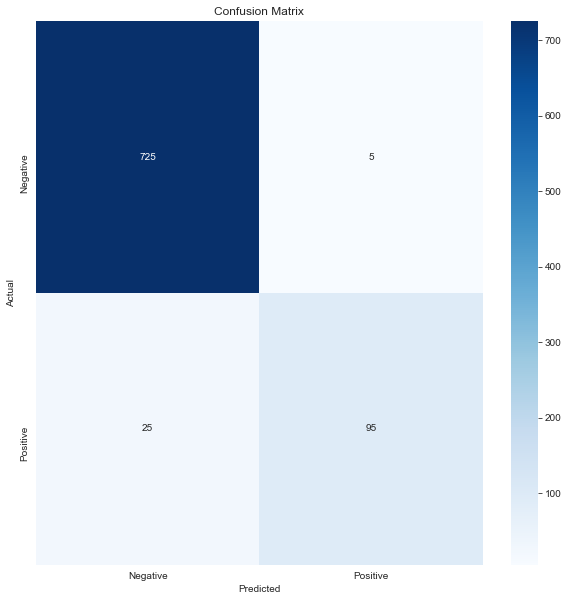

In [392]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [393]:
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
